In [33]:
import numpy as np

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, ConstantKernel

import matplotlib.pyplot as plt

In [34]:
import numpy as np
import pandas as pd

import tensorflow
import autokeras as ak

from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction

import matplotlib.pyplot as plt
from matplotlib import gridspec

from sklearn.model_selection import train_test_split
from IPython.display import clear_output

### Define Objective

In [35]:
noise = 0.1
bounds = np.array([[-1.0, 2.0]], dtype=np.double)

def f(X, noise=noise):
    return -np.sin(3*X) - X**2 + 0.7*X + noise * np.random.randn(*X.shape)

# Dense grid of points within bounds
X = np.arange(bounds[:, 0], bounds[:, 1], 0.01).reshape(-1, 1)

# Noise-free objective function values at X 
y = f(X,noise)

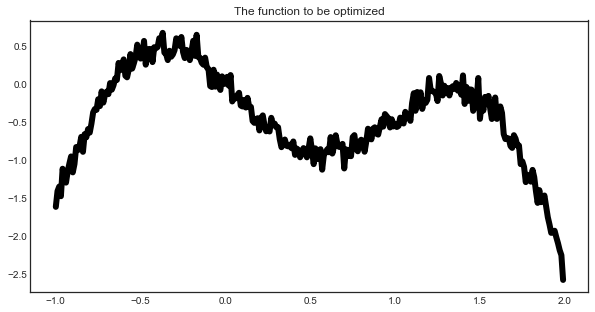

In [36]:
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10, 5))
    plt.plot(X, y, c='k', linewidth=6)
    plt.title('The function to be optimized')
    plt.show()

### Setting a Gaussian Process prior¶


In [37]:
# kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
kernel = ConstantKernel() + Matern(length_scale=2, nu=3/2) + WhiteKernel(noise_level=1)
model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
model.fit(X, y)
model.kernel_

1.37**2 + Matern(length_scale=0.843, nu=1.5) + WhiteKernel(noise_level=0.00968)

In [44]:
y_pred, std = model.predict(X, return_std=True)

MSE = ((y_pred-y)**2).mean()
print('MSE: %.2f' % MSE)

MSE: 0.01


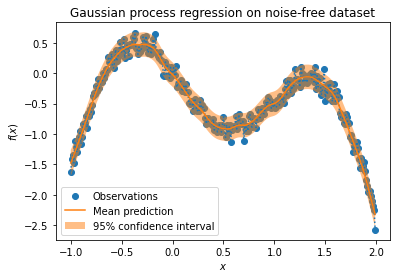

In [38]:
mean_prediction, std_prediction = model.predict(X, return_std=True)

plt.plot(X, y, linestyle="dotted")
plt.scatter(X, y, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction.reshape(-1, ) - 1.96 * std_prediction,
    mean_prediction.reshape(-1, ) + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")

## Bayesian Optimization

In [51]:
from skopt import gp_minimize

res = gp_minimize(model,    # the function to minimize
                  [(-1.0, 2.0)],      # the bounds on each dimension of x
                  acq_func="EI",      # the acquisition function
                  n_calls=15,         # the number of evaluations of f
                  n_random_starts=5,  # the number of random initialization points
                  noise=0.1**2,       # the noise level (optional)
                  random_state=1234)   # the random seed

TypeError: 'GaussianProcessRegressor' object is not callable

In [32]:
model = SingleTaskGP(X, y)
mll = ExactMarginalLogLikelihood(model.likelihood, model)
fit_gpytorch_model(mll);

AttributeError: 'numpy.ndarray' object has no attribute 'dim'

In [31]:
from botorch.acquisition import qKnowledgeGradient


NUM_FANTASIES = 128 if not SMOKE_TEST else 4
qKG = qKnowledgeGradient(model, num_fantasies=NUM_FANTASIES)

TypeError: sklearn.gaussian_process._gpr.GaussianProcessRegressor is not a Module subclass